In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00


In [2]:
!pip install qiskit_nature


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 23.3 MB/s eta 0:00:00


In [3]:
!pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 18.9 MB/s eta 0:00:00


In [4]:
!pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.5 MB/s eta 0:00:00


In [5]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=bc2c36c8d4f12d11c13a3169788c35218ce79610329b8286b7688a74c017683f
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


## Definiendo problemas moleculares

In [6]:
from qiskit_nature.second_q.drivers import PySCFDriver
driver = PySCFDriver(atom="H 0 0 0; H 0 0 0.735")
problem = driver.run()
hamiltonian = problem.hamiltonian.second_q_op()
print(hamiltonian)

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.33229086512764816 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.33229086512764816 * ( +_0 +_3 -_3 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.0904655998921157 * ( +_0 +_1 -_0 -_1 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.0904655998921157 * ( +_0 +_3 -_2 -_1 )
+ 0.0904655998921157 * ( +_1 +_0 -_1 -_0 )
+ 0.0904655998921157 * ( +_1 +_1 -_0 -_0 )
+ 0.0904655998921157 * ( +_1 +_2 -_3 -_0 )
+ 0.0904655998921157 * ( +_1 +_3 -_2 -_0 )
+ 0.33229086512764816 * ( +_1 +_0 -_0 -_1 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764816 * ( +_1 +_2 -_2 -_1 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.33229086512764816 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740175813 * ( +_2 +_2 -_2 -_2 )
+ 0.33229086512764816 * ( +_2 +_3 -_3 -_2 )
+ 0.0904655998921157 * ( +_2 +_0 -_1 -_3 )
+ 0.0904655998921157 * ( +

In [7]:
from qiskit_nature.second_q.mappers import ParityMapper
mapper = ParityMapper(num_particles=problem.num_particles)
qubit_op = mapper.map(hamiltonian)
aux_ops = {}
aux_ops.update(mapper.map(problem.properties.particle_number.second_q_ops()))
aux_ops.update(mapper.map(problem.properties.angular_momentum.second_q_ops()))
aux_ops.update(mapper.map(problem.properties.magnetization.second_q_ops()))
print(qubit_op)


SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05237325+0.j,  0.39793742+0.j, -0.39793742+0.j, -0.0112801 +0.j,
  0.1809312 +0.j])


In [8]:
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
solver = NumPyMinimumEigensolver()
result = solver.compute_minimum_eigenvalue(qubit_op)
print(result)

{   'aux_operators_evaluated': None,
    'eigenstate': Statevector([-4.16333634e-17+5.55111512e-17j,
             -7.22856695e-01-6.81936898e-01j,
              8.11307233e-02+7.65380388e-02j,
              1.11022302e-16-6.93889390e-17j],
            dims=(2, 2)),
    'eigenvalue': np.float64(-1.857275030202381)}


## Resolviendo el problema con VQE

This circuit has 4 parameters


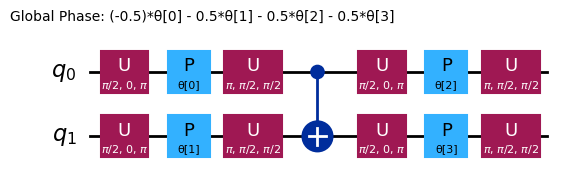

In [11]:
from qiskit.circuit.library import efficient_su2
ansatz = efficient_su2
qubit_op.num_qubits, su2_gates==["h", "rz", "y"], entanglement="circular", reps=1
num_params = ansatz.num_parameters
print("This circuit has", num_params, "parameters")
ansatz.decompose().draw("mpl", style="iqp")


In [14]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
backend = AerSimulator(method="statevector")

In [18]:
def cost_func(params, ansatz, qubit_op, estimator, cost_history_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        qubit_op (SparsePauliOp): Operator representation of Hamiltonian (or qubit operator)
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict (dict): Dictionary for storing intermediate results (e.g., iterations and costs)

    Returns:
        float: Energy estimate
    """
    # Create a Primitive Unified Buffer (PUB) for the estimator
    pub = (ansatz, [qubit_op], params)

    # Run the estimator and get the result
    result = estimator.run(pubs=[pub]).result()

    # Extract the energy (expected value) from the result
    # For EstimatorV2, this is typically found in the `evs` (expected values) array of the first data item.
    energy = result[0].data.evs[0]

    # Update the cost history dictionary
    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)

    # Print the current iteration and cost
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

In [19]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [20]:
from qiskit_ibm_runtime import Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from scipy.optimize import minimize
import numpy as np
from qiskit.primitives import StatevectorEstimator

# --- Asumir que ansatz y qubit_op están definidos aquí ---

# 1. Inicializar el estimador para simulación local
estimator = StatevectorEstimator()

# 2. Inicializar los parámetros iniciales
num_params = ansatz.num_parameters
x0 = np.random.rand(num_params) * 2 * np.pi  # Mejor usar valores aleatorios en [0, 2*pi] que todos 0.1

# 3. Inicializar el diccionario de historial (requerido por cost_func)
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

# 4. Ejecutar el optimizador
# NOTA: Ahora pasamos 'cost_history_dict' como el cuarto argumento adicional.
res = minimize(
        fun=cost_func,  # La función de coste
        x0=x0,          # Los parámetros iniciales
        args=(ansatz, qubit_op, estimator, cost_history_dict), # Argumentos posicionales extra para cost_func
        method="cobyla",
        options={"maxiter": 500},
    )

Iters. done: 1 [Current cost: -0.9077530006628145]
Iters. done: 2 [Current cost: -0.9021154378340455]
Iters. done: 3 [Current cost: -0.3549228360289432]
Iters. done: 4 [Current cost: -0.8076252843273213]
Iters. done: 5 [Current cost: -1.0571514768396033]
Iters. done: 6 [Current cost: -1.6892172867577933]
Iters. done: 7 [Current cost: -1.1546618668958355]
Iters. done: 8 [Current cost: -1.4588153559255739]
Iters. done: 9 [Current cost: -1.7938449776780603]
Iters. done: 10 [Current cost: -1.7147253033237333]
Iters. done: 11 [Current cost: -1.7715753914008607]
Iters. done: 12 [Current cost: -1.8182595241689719]
Iters. done: 13 [Current cost: -1.8229764094512342]
Iters. done: 14 [Current cost: -1.8107254971464415]
Iters. done: 15 [Current cost: -1.8298377735231677]
Iters. done: 16 [Current cost: -1.8427684799861406]
Iters. done: 17 [Current cost: -1.8508387612087875]
Iters. done: 18 [Current cost: -1.854072459281958]
Iters. done: 19 [Current cost: -1.8554728455070908]
Iters. done: 20 [Curre

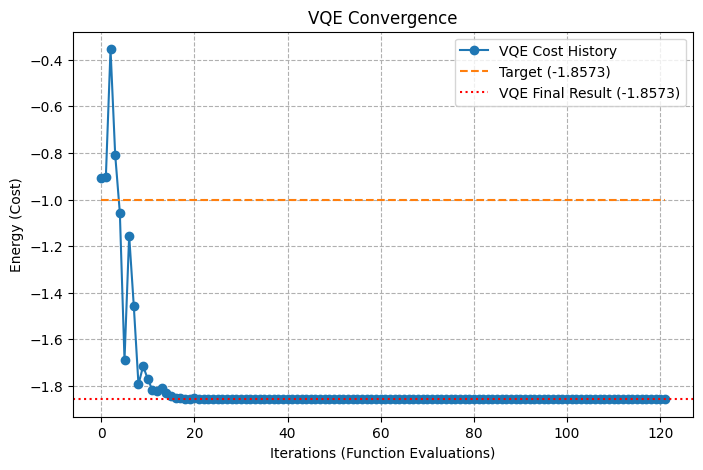

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # Necesario para np.full_like

# Asumiendo que 'res' y 'cost_history_dict' ya están definidos y llenos.

# 1. Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 5)) # Opcional: especificar tamaño

# 2. Definir el valor de energía de referencia (Target/Exacto)
# Este valor es la energía exacta del estado fundamental del H2
constant = -1.857275030202381

# 3. Definir los datos del Eje X para la gráfica VQE
# Debe ser un rango simple de 0 hasta el número de iteraciones - 1
iterations = range(cost_history_dict["iters"])

# 4. Obtener los datos del Eje Y (historial de costes)
vqe_cost_history = cost_history_dict["cost_history"]

# --- Gráfica de la Convergencia VQE ---
ax.plot(
    iterations,
    vqe_cost_history,
    label="VQE Cost History",
    marker='o',       # Opcional: añadir marcadores para claridad
    linestyle='-'     # Opcional: línea continua
)

# --- Gráfica del Valor Target ---
# El número de puntos para la línea target debe coincidir con el número de puntos de VQE,
# o podemos simplemente usar las iteraciones como eje x.
y_constant = np.full_like(np.array(iterations), constant)

ax.plot(
    iterations,       # Usamos las mismas iteraciones para el eje X
    y_constant,
    label=f"Target ({constant:.4f})",
    linestyle='--'    # Opcional: línea discontinua
)

# 5. Configurar etiquetas y leyenda
ax.set_xlabel("Iterations (Function Evaluations)")
ax.set_ylabel("Energy (Cost)")
ax.axhline(res.fun, color='r', linestyle=':', label=f"VQE Final Result ({res.fun:.4f})") # Opcional: Línea del resultado final
ax.grid(True, linestyle='--') # Opcional: Añadir rejilla
plt.legend()
plt.title("VQE Convergence")

# 6. Mostrar la gráfica
plt.show() # Usar plt.show() en lugar de plt.draw() para un entorno interactivo